<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/beauty_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy wordcloud

In [2]:
import nltk
from konlpy.corpus import kobill

In [3]:
from konlpy.tag import Twitter
from collections import Counter

In [4]:
import pandas as pd
total_data = pd.read_excel('./beauty_scraping.xlsx')
grade_4 = total_data['star grade'] >= 4.0

df_grade4 = total_data[grade_4]
df_grade4['star grade'].value_counts()

df_grade4.head(10)

,star grade,review
0,4.0,지금 두 번째 펀딩 했는데 주름이 눈에 띄게 없어졌다라기 보다 아주 조금 옅어진것 ...
1,4.0,내부사정을 자세히 알지는 못하겠고\n좋은 소식은 아닌지라\n조심스럽고 제품 신뢰도가...
2,5.0,"아침저녁 세안후 첫세럼으로 사용중입니다\n피부에 큰 트러블이 있진 않지만, 속건조?..."
3,5.0,직원분들도 너무 친절하고 좋으셨구 제품도 정말 좋습니다. 저는 문의도 많았고 직원분...
4,5.0,1차 펀딩에 이어 3차 펀딩까지 참여했는데\n사용방법에 대해 제대로 알고 사용하니 ...
5,5.0,펀딩 번호 : 6291065\n아직 케이스 리뉴얼 된건 안 왔지만 잘 사용하고 있어...
8,4.0,"제풒이야 소문이 나서 더 이상의 말이 필요 없지만,\n직원들 해고의 문제가 있는 것..."
9,4.5,현재 두번째 바틀 사용중인데 효과는 그닥..? 그래도 안쓰는거보다는 훨 나을듯하여 ...
10,5.0,저번 펀딩에도 참여해서 제품 만족도가 좋아\n또 참여하게되었습니다.\n피부가 쫀쫀해...
11,4.5,예전에는 피부가 괜찮았는데\n한번 뒤집어진 이후로 수부지는 악화되고 뭔가 속 건조와...


In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  8005 non-null   float64
 1   review      8005 non-null   object 
dtypes: float64(1), object(1)
memory usage: 125.2+ KB


In [6]:
len(total_data)

8005

In [7]:
x_data = total_data['review']
y_data = total_data['star grade']

In [8]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [9]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6003,), (6003,), (2002,), (2002,))

In [12]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  39255      0 --:--:-- --:--:-- --:--:-- 38953


In [13]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [14]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

7752                                    가격도 저렴하고 향도 너무좋아요
4302    피부탄력이랑 주름이 신경쓰이던 차에 환경도 생각하고 성분도 착한 에센스가 있어서 펀...
1422            라고 세수한번 박스에 적혀있듯이 문구값 이름 값 제대로 하는 폼클렌징...
7331                                       피부 보들보들 너무 조하요
4030    너무 깔끔하고 색도 예쁜 제품이에요 자극적이지 않고 맘에 들어요 꾸준히 바르면서 변...
                              ...                        
3252    사용한 후기 올립니다 후기 남기러 오래간만에 와디즈에 들어온것같아요코로나때문에 마스...
635                                       모공쫀쫀쫀 재구매 각 입니다
6915    활성 그동안 비싼돈주고 사쓰던 그 들은 뭐였던가 회의를 느끼며 미스트세럼 두셋트를 ...
204     솔직후기 남겨요 배송 받자마자 그날부터 쭉새에센스 딴거 제치고이아이만 쓰고 있습니다...
859     기초화장품 구매할 때 제일 신중하게 하는 편이에요민감성이라 이것저것 잘못바르면 바로...
Name: review, Length: 6003, dtype: object

In [15]:
from konlpy.tag import Mecab

In [16]:
mecab = Mecab()

In [17]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [18]:
import pickle

In [19]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [20]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['가격', '도', '저렴', '고', '향도', '너무', '아요', '!', '!!'],
 ['피부',
  '탄력',
  '이랑',
  '주름',
  '신경',
  '쓰이',
  '던',
  '차',
  '~',
  '환경',
  '도',
  '고',
  '성분',
  '도',
  '착한',
  '에센스',
  '어서',
  '펀딩',
  '게',
  '었',
  '어요',
  '.',
  '끈',
  '고',
  '매끈',
  '게',
  '흡수',
  '네요',
  '.',
  '화장',
  '솜',
  '적셔',
  '팩',
  '사용',
  '해도',
  '된다',
  '니',
  '꿀',
  '팁',
  '입니다',
  '!'],
 ['LIFE',
  'IS',
  'TOO',
  'SHORT',
  '.',
  'NO',
  'MORE',
  'DOUBLE',
  'WASH',
  '.',
  '라고',
  '세수',
  '박스',
  '적혀',
  '듯이',
  '문구',
  '값',
  ',',
  '이름',
  '값',
  '제대로',
  '폼',
  '클렌징',
  '입니다',
  '.',
  '이미',
  '저번',
  '쓰',
  '던',
  '세수',
  ',',
  '굿',
  '모링',
  '밤',
  '너무',
  '만족',
  '여',
  '재',
  '구매',
  '했',
  '습니다',
  '.',
  '저',
  '아무',
  '폼',
  '클렌징',
  '을',
  '쓸',
  '피부',
  '여서',
  '더더욱',
  '만족',
  '고',
  '감사',
  '합니다',
  '.',
  '5',
  '개월',
  '만',
  '더라도',
  '저',
  '건강',
  '고',
  '걱정',
  '피부',
  '였',
  '습니다',
  '.',
  '그런데',
  '꽤',
  '오랜',
  '사용',
  '했',
  '던',
  '스테로이드',
  '연고',
  '바르',
  '게',
  '고',
  '서',
 

In [21]:
import tensorflow as tf

In [22]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [23]:
tokenizer.fit_on_texts(sentence)

In [26]:
tokenizer.word_index


{'.': 1,
 '고': 2,
 '도': 3,
 '을': 4,
 '!': 5,
 '게': 6,
 '어요': 7,
 '는데': 8,
 '사용': 9,
 '피부': 10,
 ',': 11,
 '습니다': 12,
 '했': 13,
 '네요': 14,
 '제품': 15,
 '아요': 16,
 '해': 17,
 '펀딩': 18,
 '면': 19,
 '너무': 20,
 '쓰': 21,
 '어': 22,
 '었': 23,
 '다': 24,
 '아': 25,
 '로': 26,
 '거': 27,
 '느낌': 28,
 '만': 29,
 '겠': 30,
 '기': 31,
 '았': 32,
 '저': 33,
 '지만': 34,
 '바르': 35,
 '~': 36,
 '효과': 37,
 '해서': 38,
 '라': 39,
 '니': 40,
 '써': 41,
 '합니다': 42,
 '촉촉': 43,
 '할': 44,
 '어서': 45,
 '입니다': 46,
 '만족': 47,
 '정말': 48,
 '?': 49,
 '제': 50,
 '모공': 51,
 '많이': 52,
 '얼굴': 53,
 '아서': 54,
 '서': 55,
 '던': 56,
 '구매': 57,
 '향': 58,
 '요': 59,
 '까지': 60,
 '플': 61,
 '..': 62,
 '봤': 63,
 '앰': 64,
 '면서': 65,
 '후': 66,
 '에서': 67,
 '진짜': 68,
 '건조': 69,
 '인': 70,
 'ㅎㅎ': 71,
 ')': 72,
 '화장품': 73,
 '보다': 74,
 '세': 75,
 '시': 76,
 '처음': 77,
 '해요': 78,
 '당고': 79,
 '1': 80,
 '인데': 81,
 '세안': 82,
 '더라구요': 83,
 '마스크': 84,
 '2': 85,
 '에요': 86,
 '기대': 87,
 ':': 88,
 '크림': 89,
 '트러블': 90,
 '흡수': 91,
 '성': 92,
 '꾸준히': 93,
 '분': 94,
 '후기': 95,
 

In [27]:
tokenizer.word_counts

OrderedDict([('가격', 220),
             ('도', 8823),
             ('저렴', 62),
             ('고', 14803),
             ('향도', 164),
             ('너무', 2653),
             ('아요', 2978),
             ('!', 5601),
             ('!!', 346),
             ('피부', 4629),
             ('탄력', 211),
             ('이랑', 270),
             ('주름', 372),
             ('신경', 175),
             ('쓰이', 23),
             ('던', 1205),
             ('차', 566),
             ('~', 1703),
             ('환경', 113),
             ('성분', 622),
             ('착한', 44),
             ('에센스', 527),
             ('어서', 1378),
             ('펀딩', 2851),
             ('게', 5062),
             ('었', 2491),
             ('어요', 5062),
             ('.', 16877),
             ('끈', 228),
             ('매끈', 182),
             ('흡수', 693),
             ('네요', 3262),
             ('화장', 657),
             ('솜', 137),
             ('적셔', 19),
             ('팩', 526),
             ('사용', 4706),
             ('해도', 365),
         

In [37]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords



In [38]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)



In [42]:
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='white',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(words) 




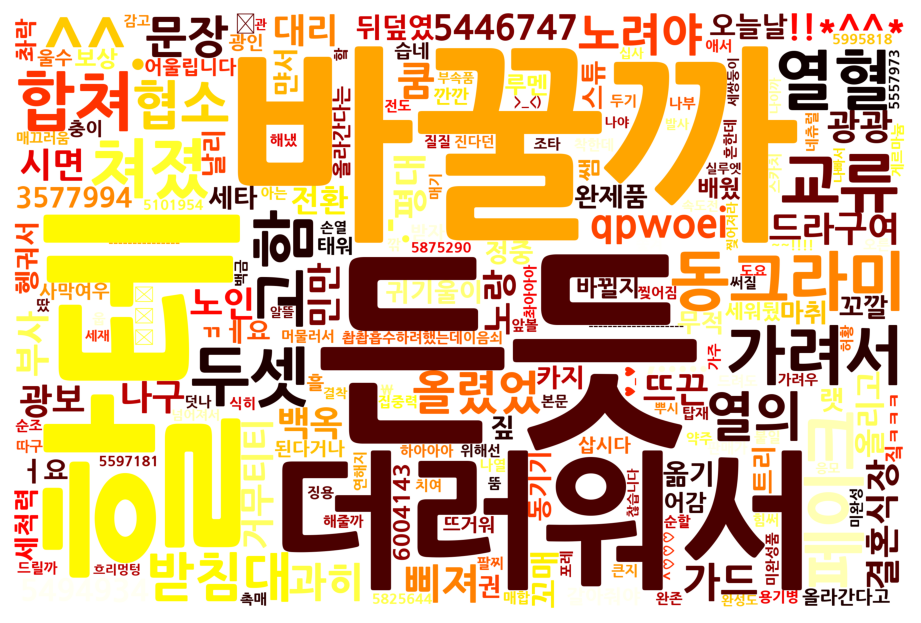

In [43]:
plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()

